In [8]:
# Dependencies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

In [9]:
# Import Netflix data

netflix_df = pd.read_csv("../CSV Resources/netflix.csv")
netflix_df = netflix_df.set_index('Title')
netflix_df.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
Breaking Bad,2008,18+,9.5,96%
Stranger Things,2016,16+,8.8,93%
Money Heist,2017,18+,8.4,91%
Sherlock,2010,16+,9.1,78%
Better Call Saul,2015,18+,8.7,97%


In [10]:
# Drop all data that is missing a rating

netflix_df_dropped = netflix_df.dropna()
netflix_df_dropped.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
Breaking Bad,2008,18+,9.5,96%
Stranger Things,2016,16+,8.8,93%
Money Heist,2017,18+,8.4,91%
Sherlock,2010,16+,9.1,78%
Better Call Saul,2015,18+,8.7,97%


In [11]:
# Convert Rotten Tomatoes ratings from percentages to integers

netflix_df_dropped['RT'] = netflix_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)
netflix_df_dropped.head()

<ipython-input-11-b6197cdee0c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df_dropped['RT'] = netflix_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)


,Year,Age,IMDB,Rotten Tomatoes,RT
Title,,,,,
Breaking Bad,2008,18+,9.5,96%,96
Stranger Things,2016,16+,8.8,93%,93
Money Heist,2017,18+,8.4,91%,91
Sherlock,2010,16+,9.1,78%,78
Better Call Saul,2015,18+,8.7,97%,97


In [12]:
# Create DataFrame to highlight Netflix ratings

imdb_average = netflix_df['IMDB'].mean()
rounded_imdb_average = round(imdb_average, 2)
rotten_average = netflix_df_dropped['RT'].mean()
rounded_rotten_average = round(rotten_average, 2)
age_group = netflix_df['Age'].mode()
total_shows = len(netflix_df)
title = netflix_df.index.to_list()

netflix_df.sort_values(by=['IMDB'], inplace=True, ascending=False)
highest_rated_imdb = netflix_df.index[0]

netflix_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)
netflix_df_dropped.head(100)
highest_rated_rt = netflix_df_dropped.index[0]

netflix = pd.DataFrame({'Total Number of Shows': total_shows,
                        'Most Popular Age Group': age_group,
                        'Highest Rated IMDB': highest_rated_imdb,
                        'IMDB Average': rounded_imdb_average,
                        'Highest Rated RT': highest_rated_rt,
                        'Rotten Tomatoes': rounded_rotten_average})
netflix

<ipython-input-12-216ff4c8e0ff>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)


,Total Number of Shows,Most Popular Age Group,Highest Rated IMDB,IMDB Average,Highest Rated RT,Rotten Tomatoes
0,1931,16+,Breaking Bad,7.16,Avatar: The Last Airbender,78.32


In [13]:
# Add year ranges column

netflix_df = netflix_df.reset_index()
bins = [1900, 1949, 1979, 1989, 1999, 2009, 2020]
groups = ['1900-1949', '1950-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2020']
pd.cut(netflix_df['Year'], bins, labels=groups)

netflix_df['Year Range'] = pd.cut(netflix_df['Year'], bins, labels=groups)
netflix_df.head()

,Title,Year,Age,IMDB,Rotten Tomatoes,Year Range
0,Breaking Bad,2008,18+,9.5,96%,2000-2009
1,Ramayan,1987,all,9.3,NaN,1980-1989
2,Our Planet,2019,7+,9.3,93%,2010-2020
3,Yeh Meri Family,2018,NaN,9.2,NaN,2010-2020
4,Avatar: The Last Airbender,2005,7+,9.2,100%,2000-2009


In [14]:
# Group year ranges together

age_range_df = netflix_df.groupby("Year Range")
age_range_df.head(50)

,Title,Year,Age,IMDB,Rotten Tomatoes,Year Range
0,Breaking Bad,2008,18+,9.5,96%,2000-2009
1,Ramayan,1987,all,9.3,NaN,1980-1989
2,Our Planet,2019,7+,9.3,93%,2010-2020
3,Yeh Meri Family,2018,NaN,9.2,NaN,2010-2020
4,Avatar: The Last Airbender,2005,7+,9.2,100%,2000-2009
...,...,...,...,...,...,...
1749,House Doctor,1998,NaN,4.8,NaN,1990-1999
1769,Black Crows,1983,NaN,4.4,NaN,1980-1989
1771,Ninja Turtles: The Next Mutation,1997,7+,4.4,NaN,1990-1999
1857,Born To Explore,1914,NaN,NaN,NaN,1900-1949


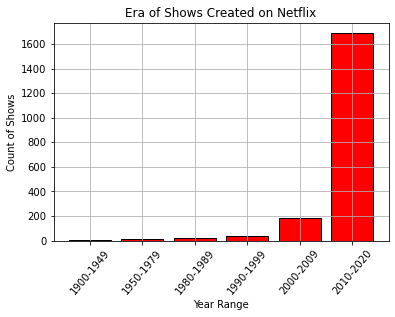

In [15]:
# Create bar chart represeting year range 

ranges = age_range_df["Year Range"].count()
plt.bar(groups, ranges, color = 'red', edgecolor = 'black');
plt.title('Era of Shows Created on Netflix');
plt.xlabel('Year Range')
plt.ylabel('Count of Shows')
plt.xticks(rotation=50);
plt.grid();

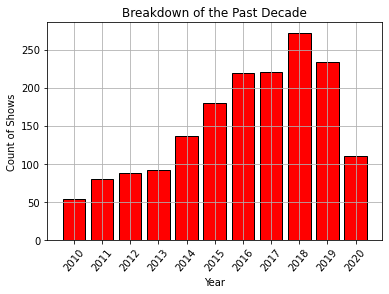

In [16]:
# Bar chart to breakdown number of movies per year in the last decade

netflix_years = netflix_df.groupby("Year")
netflix_year_count = netflix_years.count().tail(11)
top_11_years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

plt.bar(top_11_years,netflix_year_count['Title'], color = 'red', edgecolor = 'black');
plt.title('Breakdown of the Past Decade');
plt.xlabel('Year');
plt.ylabel('Count of Shows');
plt.xticks(rotation=50);
plt.grid();

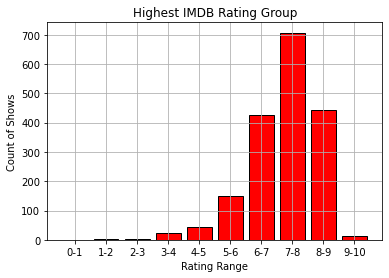

In [17]:
# Group IMDB ratings into bins to create a bar graph

bins2 = [0, .99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 7.99, 8.99, 10]
groups2 = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']
netflix_df['IMDB Rating Ranges'] = pd.cut(netflix_df['IMDB'], bins2, labels=groups2)

imdb_rating_ranges = netflix_df.groupby('IMDB Rating Ranges')
ranges2 = imdb_rating_ranges['IMDB Rating Ranges'].count()

plt.bar(groups2, ranges2, color = 'red', edgecolor = 'black');
plt.title('Highest IMDB Rating Group');
plt.xlabel('Rating Range');
plt.ylabel('Count of Shows');
plt.grid();

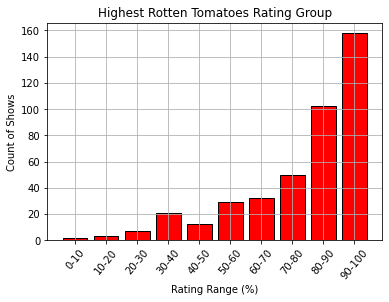

In [18]:
# Group Rotten Tomatoes ratings into bins to create a bar graph

bins3 = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 100]
groups3 = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
netflix_df_dropped['RT Rating Ranges'] = pd.cut(netflix_df_dropped['RT'], bins3, labels=groups3)

rt_rating_ranges = netflix_df_dropped.groupby('RT Rating Ranges')
ranges3 = rt_rating_ranges['RT Rating Ranges'].count()

plt.bar(groups3, ranges3, color = 'red', edgecolor = 'black');
plt.title('Highest Rotten Tomatoes Rating Group');
plt.xlabel('Rating Range (%)');
plt.ylabel('Count of Shows');
plt.xticks(rotation=50);
plt.grid();

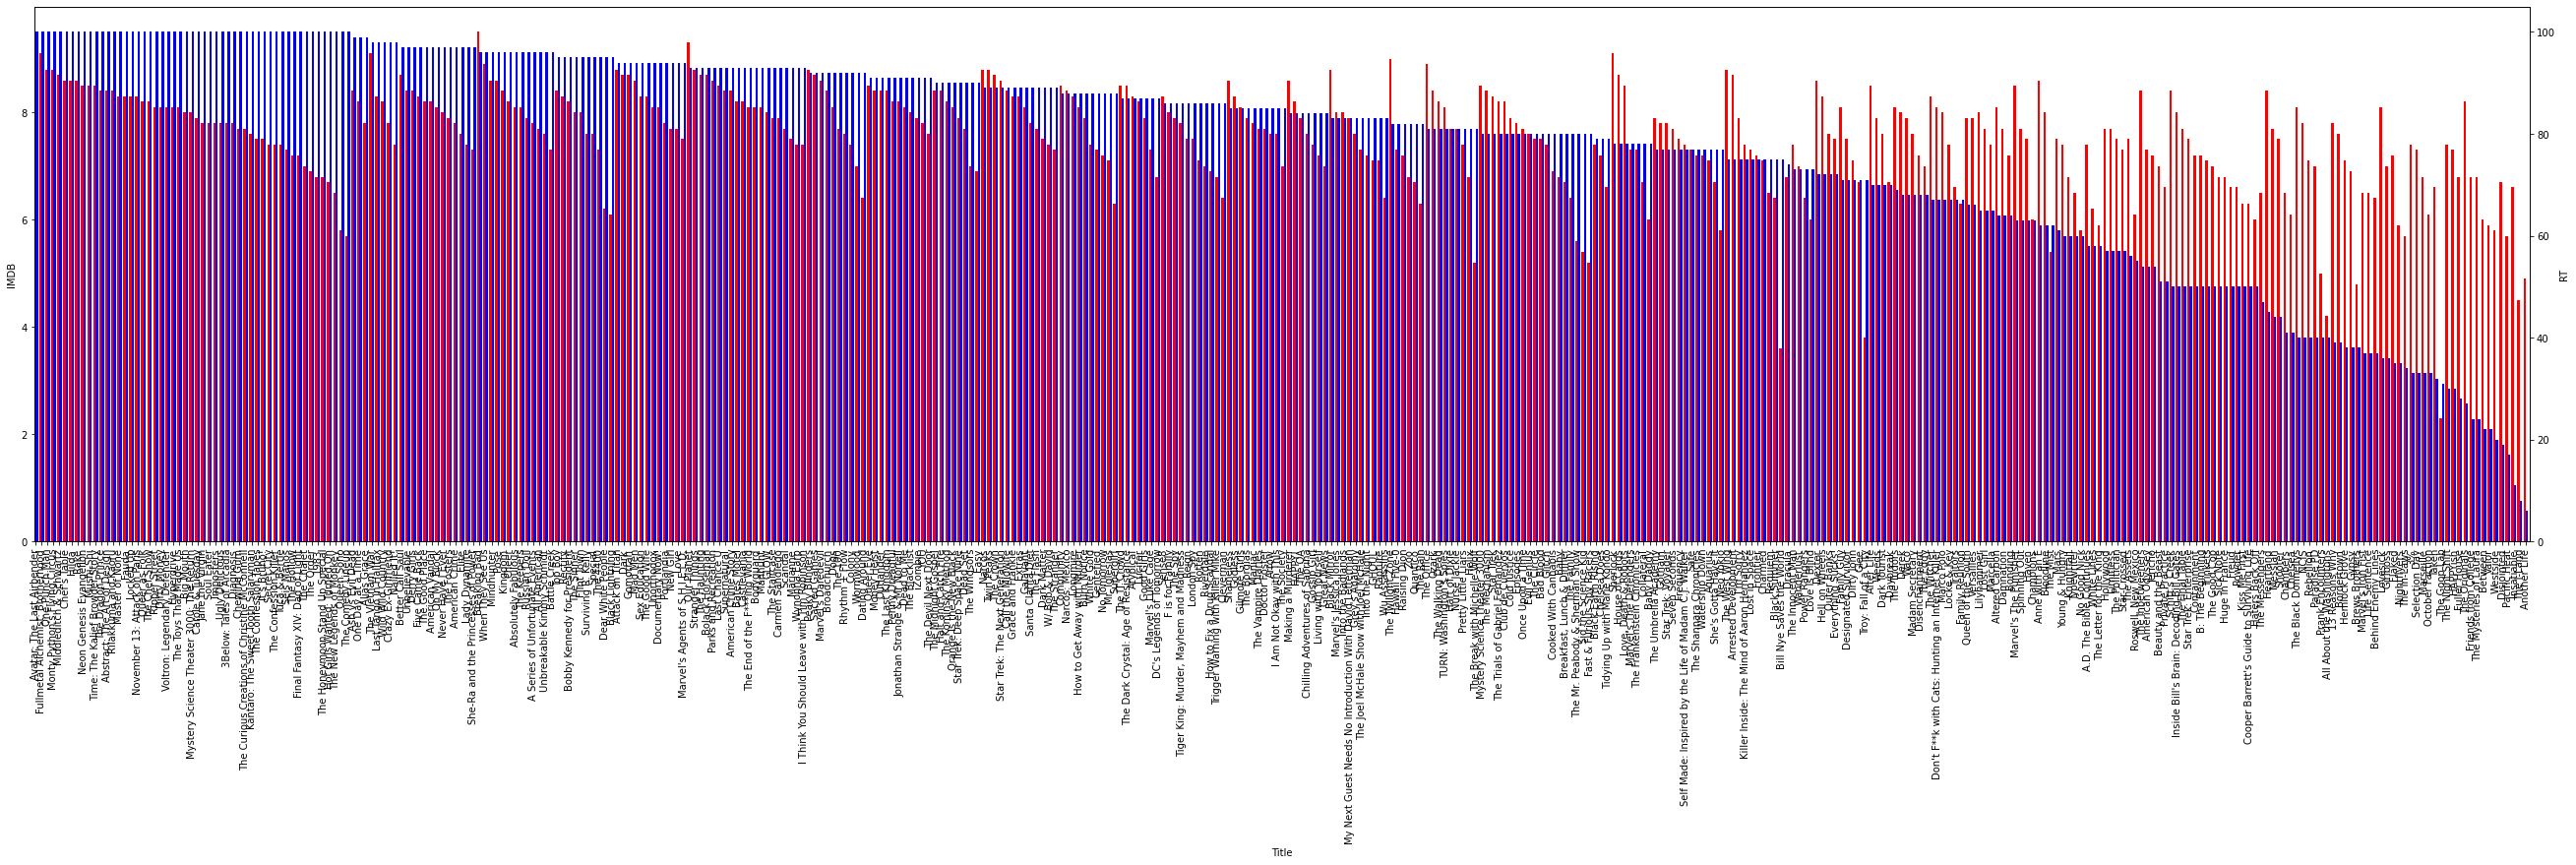

In [19]:
# Compares each show's IMDB and Rotten Tomatoes' rating

fig = plt.figure(figsize=(100,10))
ax = fig.add_subplot(121)
ax2 = ax.twinx()
width = 0.4
netflix_df_dropped.IMDB.plot(kind='bar', color='red', ax=ax, width=width, position=1);
netflix_df_dropped.RT.plot(kind='bar', color='blue', ax=ax2, width=width, position=0);
ax.set_ylabel('IMDB');
ax2.set_ylabel('RT');

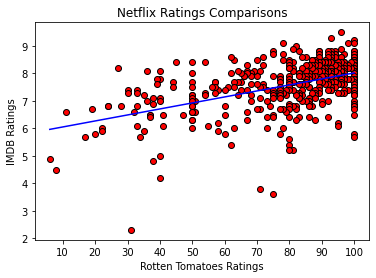

The correlation between both factors is 0.49


In [66]:
# Find any correlation between IMDB & Rotten Tomatoes ratings using scatter plot

netflix_RT = netflix_df_dropped['RT']
netflix_IMBD_ratings = netflix_df_dropped['IMDB']

x_values = netflix_RT
y_values = netflix_IMBD_ratings
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(netflix_RT,netflix_IMBD_ratings, facecolor='red', edgecolor="black");
plt.plot(x_values,regress_values,"blue");
plt.title('Netflix Ratings Comparisons');
plt.xticks([10,20,30,40,50,60,70,80,90,100]);
plt.xlabel('Rotten Tomatoes Ratings');
plt.ylabel('IMDB Ratings');
plt.xlim = (0,100);
plt.show()

correlation = st.pearsonr(netflix_RT,netflix_IMBD_ratings)
print(f"The correlation between both factors is {round(correlation[0],2)}")

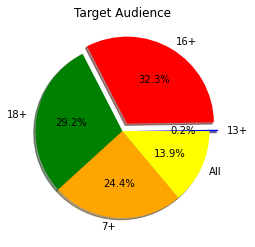

In [92]:
#Netflix target audience pie chart

netflix_age_group = netflix_df.groupby("Age")
age_count = netflix_age_group.count()

explode = (0.1,0.1,0,0,0)
labels = ['13+','16+','18+','7+','All']
colors = ['blue','red','green','orange','yellow']

plt.pie(age_count['Title'],explode = explode, labels = labels, colors = colors,autopct="%1.1f%%", shadow=True);
plt.title('Target Audience');